In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.spatial import ConvexHull

def kmeans_iter_graph (point_list=[], *arg, k):
    # combine the lists
    points = np.concatenate([p for p in point_list])
    colors = ['b', 'g', 'r', 'y', 'm', 'k', 'c']
    
    # select k random points
    centroids = points[np.random.randint(0,len(points),k)]
    
    plt.figure (figsize=(8,8))
    plt.plot(points[:,0], points[:,1], 'bo')
    plt.plot(centroids[:,0],centroids[:,1],'r*',markersize=20)
    plt.title('Initial Random Centroids')

    old_centroids = []
    counter = 0
    
    while not np.array_equal(centroids,old_centroids):
        # for each point in points, get the distance from each centroid and find
        # the nearest centroid.
        counter+=1
        old_centroids = centroids

        distances = [[linalg.norm(point-centroids[j]) for j in range(k)] for point in points]
        labels = np.asarray([np.argmin(distances[i]) for i in range(len(points))])

        # now get the new centroids from each label group
        centroids = []
        
        plt.figure(figsize=(8,8))
        plt.title('Iteration #'+str(counter))
        for i in range(k):
            # Do mean of each dimension separately...
            current_points = points[np.where(labels==i)]
            hull=ConvexHull(current_points)
            centroids.append([np.mean(current_points[:,0]),np.mean(np.mean(current_points[:,1]))])
            plt.plot(current_points[:,0],current_points[:,1], '%so'%colors[i],alpha=0.2)
            plt.plot(centroids[i][0],centroids[i][1], '%s*'%colors[i], markersize=20)
            plt.plot(old_centroids[i][0],old_centroids[i][1], '%s*'%colors[i], markersize=20, alpha=0.3)
            plt.plot([centroids[i][0],old_centroids[i][0]],[centroids[i][1],old_centroids[i][1]], '%s-'%colors[i], alpha=1.0)
            for simplex in hull.simplices:
                plt.plot(current_points[simplex,0],current_points[simplex,1], '%s--'%colors[i],alpha=0.3)
            plt.title('Iteration ' + str(counter))

    print('Final Centroid Coordinates:')
    print(centroids)

In [13]:
points1 = np.random.standard_normal((100,2))
points2 = np.random.normal(10,2,(100,2))
points3 = np.random.normal(5,2,(100,2))
point_list = [points1,points2,points3]

Final Centroid Coordinates:
[[0.1349593611939775, 0.17504145604698543], [5.1645028250816249, 5.511584422041488], [10.029352412418282, 10.2772705510121]]


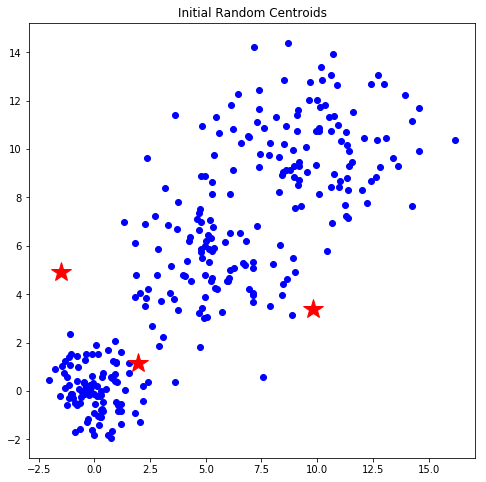

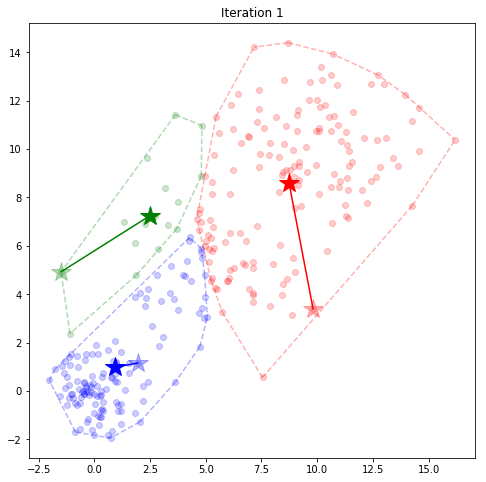

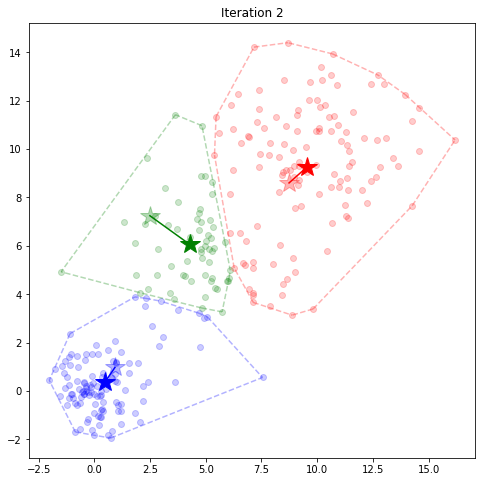

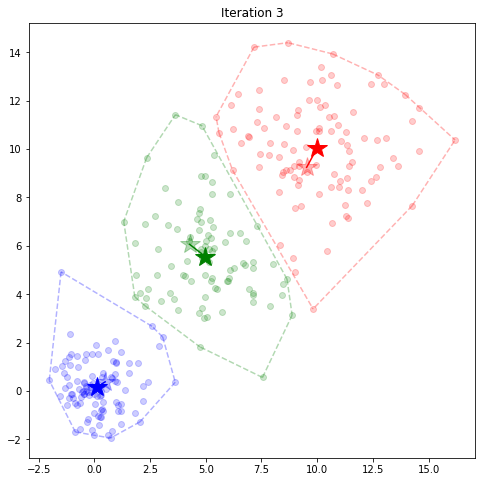

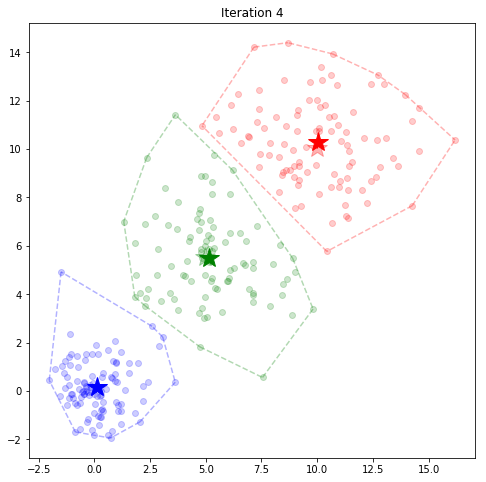

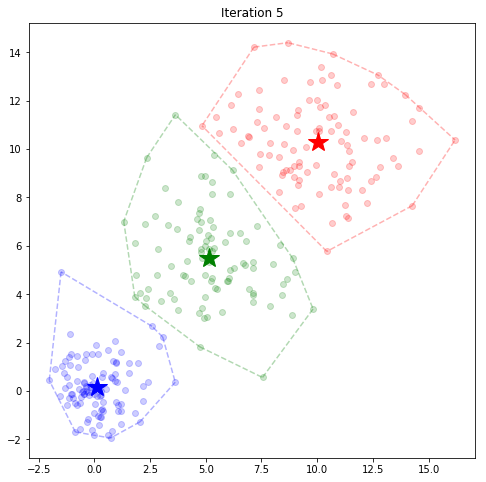

In [14]:
kmeans_iter_graph(point_list,k=3)